In [20]:
import numpy as np
import scipy as sc
import math

# Time-Dependent disk

The evolution equation for the disk profile $\Sigma(r,t)$ is:
$$\frac{\partial \Sigma}{\partial t} = \frac{3}{r}\frac{\partial}{\partial r}\left(r^{1/2}\frac{\partial}{\partial r} [\nu \Sigma r^{1/2}]\right)$$

Here, we have assumed that $\Omega =\Omega_k= \sqrt{GM/r^3}$

## Thin disk approximation:

- $$\rho = \frac{\Sigma}{H}$$
- $$ H = R\frac{c_s}{v_\phi}$$

with $c_s^2=p/\rho$ is the sound speed. With the Shakura \& Sunyaev description for the viscosity ($\nu=\alpha c_s H$):
$$ c_s^2 = \frac{\nu}{\alpha}\Omega$$

For a radiative energy transport:
$$F=\frac{4\sigma_{SB}}{3 \kappa \rho}\frac{T_c^4}{H}$$

should equals the viscous heat:

\begin{equation}
\frac{4\sigma_{SB}}{3\tau}T_c^4=D(R)=\frac{9}{8}\nu\Sigma \Omega^2
\end{equation}

Asuming that the opacity has the form $\kappa=\kappa_o \rho^aT^b$, the optical depht can be written as:

$$ \tau = \kappa\Sigma = \kappa_o\frac{\Sigma^{a+1}T^b}{H^a} \rightarrow \nu = \frac{32 \sigma_{SB}}{27} \frac{T^{4-b}}{\kappa_0\Sigma^{a+1}\Omega^2}\left(\frac{\nu}{\alpha c_s}\right)^{a}$$
- electron - scattering:  $a = b$ and $b = 0$;
- bound free $a=1$ and $b=7/2$

Also, assuming an ideal gass law and gas preassure dominates over radiation pressure: 
$$ T = \frac{P}{\rho}\frac{\mu m_p}{\kappa_B}=c_s^2 \frac{\mu m_p}{\kappa_B}  $$

Then



$$  \nu^{1-a} = \frac{32 \sigma_{SB}}{27} \frac{c_s^{2(4-b)-a}}{\kappa_0\Sigma^{a+1}\Omega^2}\left(\frac{\mu m_p}{\kappa_B}  \right)^{4-b}\left(\frac{1}{\alpha }\right)^{a} = \frac{32 }{27} \frac{\sigma_{SB}}{\kappa_0\Sigma^{a+1}\Omega^2}\left(\frac{\mu m_p}{\kappa_B}  \right)^{4-b}\left(\frac{1}{\alpha }\right)^{a}\left(\frac{\nu}{\alpha}\Omega\right)^{(2(4-b)-a)/2} $$

Then, the viscosity can be write as:
$$\nu = C r^p \Sigma^q$$

with 
- $$p=3\left(\frac{1}{2}-\frac{a+1}{6-2b+a}\right)$$
- $$q = \frac{2(a+2)}{6-2b+a}$$
- $$C=\alpha^{1+\frac{2}{6-2b+a}}\left(\frac{27\kappa_0}{32\sigma_{SB}}\right)^{\frac{2}{6-2b+a}}\left(\frac{\kappa_B}{\mu m_p}\right)^{1+\frac{2-a}{6-2b+a}}\left(GM\right)^{\frac{a+1}{6-2b+a}-\frac{1}{2}}$$

Making:
-$$\sigma=\frac{\Sigma}{\Sigma_o}\qquad R=\frac{r}{r_0} \; \mathrm{and} \qquad \tau=\frac{t}{t_0}$$

The first equation is:
The evolution equation for the disk profile $\Sigma(r,t)$ is:
$$\frac{\partial \sigma}{\partial \tau} = \frac{3}{R}\frac{\partial}{\partial R}\left(R^{1/2}\frac{\partial}{\partial R} [\hat{\nu} \sigma R^{1/2}]\right)$$

with $t_0=3r_0^2/4\nu_0$.

Additionally making $x=\sqrt{r}$ and $\sigma= SR^{-3/2}$

$$\frac{\partial S}{\partial \tau} = \frac{\partial^2}{\partial x^2} \left( \frac{S\hat{\nu}}{x^2}\right)$$

In general: $\hat{\nu}=x^{2p-3q}S^{q}$


In [21]:
#Constants
Msun =1.989e33
Rsun = 6.95e10
G = 6.6738e-14*(10**2)**3 
kB =1.38065e-16 
sB = 5.67e-5
mp = 1.67e-24
yr = 365*24*60*60

def beta(r,s):
    return ( math.gamma(r) * math.gamma(s) ) / math.gamma(r+s) 

In [105]:
class DiskProfile:
    
    def __init__(self, a, b, kappa0, Mdisk, Mc, J0, alpha, mu):
        
        
        den = ( 6 - 2 * b + a )
        den = 1.0 / den
        
        self.q =  2 * ( a + 2 ) * den ;
        self.p = p = -3 * ( ( a+1 ) * den - 0.5 )
        
        f1 = alpha ** ( 2.0 *den + 1.0)
        f2 = ( 27.0  *kappa0 / (32.0 * sB ) )** ( 2.0*den )
        f4 = ( kB / ( mu * mp) ) ** ( ( 2.0 - a )*den +1.0 )
        f3 = ( G * Mc * Msun)**( ( a+1 )*den - 0.5 )
        self.C = f1*f2*f3*f4
        
        self.kappa = ( self.q / ( ( 4.0*self.q - 2.0*self.p + 4.0 )*( 5.0*self.q - 2.0*self.p + 4.0 ) ) )**( 1.0 / self.q );
        self.GammaM = self.kappa * self.q / ( 4.0*self.q - 2.0*self.p + 4.0)
        self.GammaJ = self.kappa*( self.q + 1.0 ) / ( 4.0*self.q - 2.0*self.p + 4.0 ) * beta( 1.0 + 1.0 / self.q , 1.0 + 1.0 / ( 4.0 - 2.0 * self.p / ( self.q + 1 ) ) )
        
        self.R0 = ( 1.0 / ( G * Mc * Msun ) ) * ( (self.GammaM /self.GammaJ) * ( J0 / (Mdisk*Msun) ) )**2;
        self.Sigma0 = Mdisk*Msun / ( 4*np.pi * self.R0**2 * self.GammaM)
        
        self.nu0 = self.C * ( self.R0**self.p) * ( self.Sigma0**self.q ) 
        self.tau0 = ( 4.0 / 3.0 ) * self.R0**2 / self.nu0
    

        
        #self.dtheta_dxi = []
        
        self.tgrid = np.arange(1.0,100.0, 0.1)
        Nlen = len(self.tgrid)
        self.RRout = np.zeros(Nlen)
        
        self.Ngrid = 100
        self.rgrid = np.zeros(( Nlen, self.Ngrid))
        self.SSigma = np.zeros(( Nlen, self.Ngrid))
        
        self._Rout()
        self._Sigma()
        
    def _Rout(self):
        i=0
        for tt in self.tgrid:
            self.RRout[i] = self.R0 * ( 1.0 + tt )** ( 2.0 / ( 5.0*self.q - 2.0*self.p + 4.0 ));
            
            Deltax = (self.RRout[i]-self.R0) / (self.Ngrid-1)
            self.rgrid[i,:] = [ self.R0  + j*Deltax for j in range(self.Ngrid) ]
            i+=1
            
    def _Sigma(self):
        b1 = ( - 5.0 / ( 5.0*self.q - 2.0*self.p + 4.0 ) ) 
        a1 =  -self.p / ( self.q+1.0 ) 
        a2 = 2.0 + a1
        a3 = 1.0 / self.q
        i=0
        for tt in self.tgrid:
            ft = ( 1.0 + tt )**b1
            Rt = self.RRout[i]
            
            for j in range(self.Ngrid):
                self.SSigma[i,j] = self.Sigma0 * self.kappa *  ft * ( self.rgrid[i,j] / Rt )**a1 * ( 1.0 - ( self.rgrid[i,j] / Rt  )**a2 )**a3
            
            i+=1
            
        

In [106]:
#Thomson scattering opacity
disk1 = DiskProfile( 0.0, 0.0, 0.2, 1e-5,1.4, 1.03e47 , 0.1 , 0.625)

<ipython-input-105-e4bf6b4d156a>:63: RuntimeWarning: invalid value encountered in double_scalars
  self.SSigma[i,j] = self.Sigma0 * self.kappa *  ft * ( self.rgrid[i,j] / Rt )**a1 * ( 1.0 - ( self.rgrid[i,j] / Rt  )**a2 )**a3


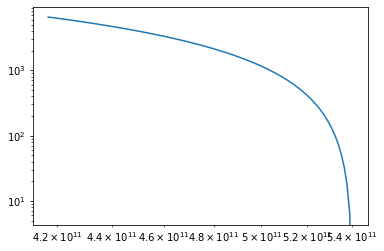

In [110]:
plt.loglog(disk1.rgrid[0,:],disk1.SSigma[0,:])